In [121]:
import pandas as pd

# wczytuje plik z platkami, uzywam srednika i przecinka jako separatora dziesietnego
# dzieki temu blonnik i weglowodany beda od razu liczbami a nie tekstem
df_cereals = pd.read_csv('lab2zad3.csv', sep=';', decimal=',')

# ustawiam pandas tak, zeby nie ukrywal wierszy w srodku tabeli
pd.set_option('display.max_rows', None)

# wyswietlam cala tabele, zeby mozna bylo przejrzec kazdy produkt po kolei
display(df_cereals)

,nazwa,producent,kalorie,cukry,weglowodany,proteiny,tluszcz,sod,blonnik,potas,Liczba_polek,srodk_polka,polka_1,polka_2,polka_3
0,100%_Bran,N,70,6,5.0,4,1,130,10.0,280,3,N,0,0,1
1,100%_Natural_Bran,Q,120,8,8.0,3,5,15,2.0,135,3,N,0,0,1
2,All-Bran,K,70,5,7.0,4,1,260,9.0,320,3,N,0,0,1
3,All-Bran_with_Extra_Fiber,K,50,0,8.0,4,0,140,14.0,330,3,N,0,0,1
4,Almond_Delight,R,110,8,14.0,2,2,200,1.0,1,3,N,0,0,1
5,Apple_Cinnamon_Cheerios,G,110,10,10.5,2,2,180,1.5,70,1,N,1,0,0
6,Apple_Jacks,K,110,14,11.0,2,0,125,1.0,30,2,T,0,1,0
7,Basic_4,G,130,8,18.0,3,2,210,2.0,100,3,N,0,0,1
8,Bran_Chex,R,90,6,15.0,2,1,200,4.0,125,1,N,1,0,0
9,Bran_Flakes,P,90,5,13.0,3,0,210,5.0,190,3,N,0,0,1


1.Które wartości odżywcze determinują umieszczenie płatków śniadaniowych na poziomie środkowej półki?

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Wybieramy dane do nauki: y to informacja, czy płatki są na 2. półce
y = df_cereals['polka_2'].values

# 2. Wybieramy składniki odżywcze, które będziemy analizować jako cechy
cechy = ['tluszcz', 'proteiny', 'potas', 'blonnik', 'sod', 'cukry','weglowodany']
X = df_cereals[cechy].values

# 3. Skalujemy dane, żeby składniki o dużych wartościach nie zdominowały modelu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#StandardScaler przesuwa średnią do 0 i ściska dane tak, by odchylenie standardowe #wynosiło 1. Teraz 1 gram tłuszczu jest matematycznie porównywalny z 100 mg sodu.

# 4. Tworzymy i trenujemy model regresji logistycznej
# Dajemy mu 1000 iteracji, żeby na pewno zdążył wszystko policzyć
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

# 5. Wyciągamy wagi (współczynniki), żeby zobaczyć co ma największy wpływ
wspolczynniki = model.coef_[0]

# Wypisujemy wyniki w konsoli
print("Model został wytrenowany!")
for nazwa, wartosc in zip(cechy, wspolczynniki):
    print(f"Cecha: {nazwa:10} | Współczynnik: {wartosc:.4f}")
    
# Wypisanie wyrazu wolnego (beta0)
print(f"\nWyraz wolny (beta0) wynosi: {model.intercept_[0]:.4f}")

Model został wytrenowany!
Cecha: tluszcz    | Współczynnik: -0.0049
Cecha: proteiny   | Współczynnik: -0.1813
Cecha: potas      | Współczynnik: -0.6238
Cecha: blonnik    | Współczynnik: -0.7066
Cecha: sod        | Współczynnik: -0.4263
Cecha: cukry      | Współczynnik: 0.8307
Cecha: weglowodany | Współczynnik: -0.1143

Wyraz wolny (beta0) wynosi: -1.4413


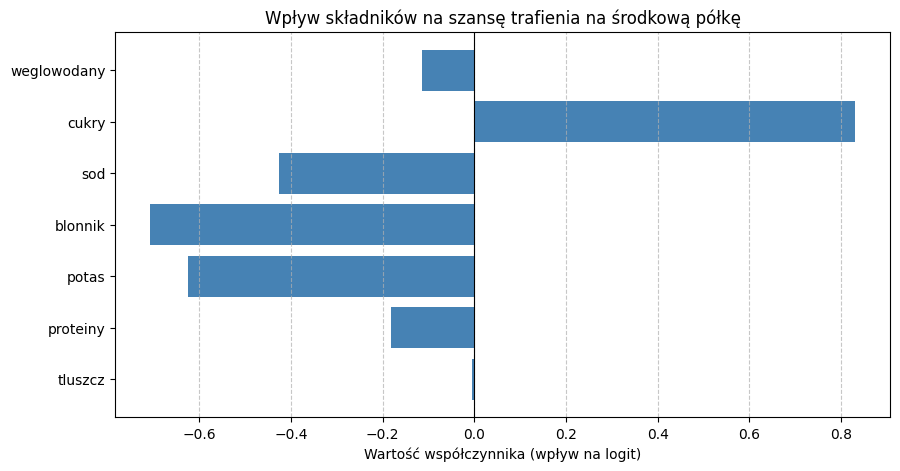

In [123]:
# Przygotowujemy wykres pokazujący wagi poszczególnych składników
plt.figure(figsize=(10, 5))
# Robimy poziomy wykres słupkowy
plt.barh(cechy, wspolczynniki, color='steelblue')
# Dodajemy linię na poziomie zero dla lepszej orientacji
plt.axvline(0, color='black', linewidth=0.8)
# Opisujemy osie i dajemy tytuł
plt.xlabel('Wartość współczynnika (wpływ na logit)')
plt.title('Wpływ składników na szansę trafienia na środkową półkę')
# Dodajemy przerywaną siatkę w pionie
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

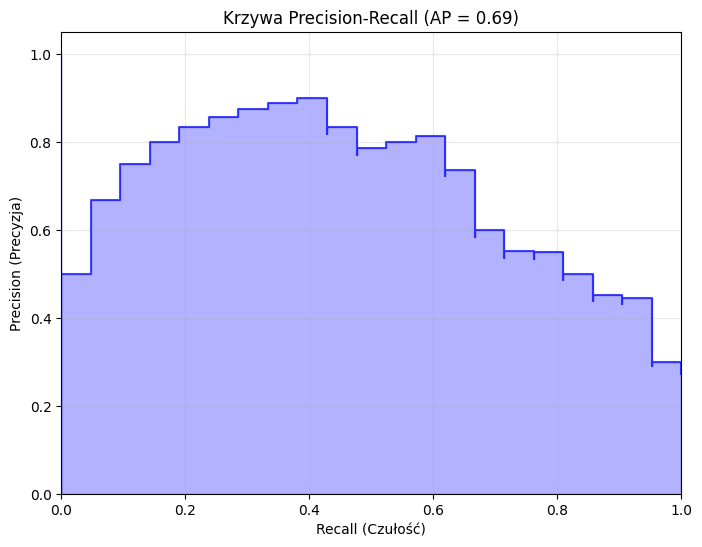

Średnia Precyzja (Average Precision): 0.6874


In [124]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Liczymy prawdopodobieństwo dla każdego produktu (używamy danych przeskalowanych)
y_probs = model.predict_proba(X_scaled)[:, 1] 
#Wyciągam prawdopodobieństwa dla klasy "1" (czyli "jest na 2. półce").
fpr, tpr, thresholds = roc_curve(y, y_probs)
auc_val = roc_auc_score(y, y_probs)

# 2. Obliczamy punkty potrzebne do narysowania krzywej Precision-Recall
precision, recall, _ = precision_recall_curve(y, y_probs)

# 3. Liczymy wskaźnik AP, czyli pole pod krzywą (nasza ogólna jakość modelu)
ap_score = average_precision_score(y, y_probs) 

# 4. Rysujemy wykres jakości modelu
plt.figure(figsize=(8, 6))
# Funkcja plt.step rysuje linię schodkową
plt.step(recall, precision, color='b', alpha=0.7, where='post')
# Wypełniamy pole pod linią niebieskim kolorem
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')

# Ustawienia wyglądu i zakresów osi
plt.xlabel('Recall (Czułość)')
plt.ylabel('Precision (Precyzja)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Krzywa Precision-Recall (AP = {ap_score:.2f})')
plt.grid(alpha=0.3)
plt.show()

# Wypisujemy dokładną wartość AP pod wykresem
print(f"Średnia Precyzja (Average Precision): {ap_score:.4f}")

2.Na której półce stoją płatki o największej kaloryczności?

In [125]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# 1. Sprawdzamy, które płatki są "wysokokaloryczne" 
# Liczymy średnią dla całego zbioru i oznaczamy te powyżej średniej jako 1
srednia_kalorii = df_cereals['kalorie'].mean()
y = (df_cereals['kalorie'] > srednia_kalorii).astype(int)

# 2. Jako cechy do modelu bierzemy tylko numer półki
cechy_polek = ['polka_1', 'polka_2', 'polka_3']
X = df_cereals[cechy_polek].values

# 3. Tworzymy i trenujemy model, żeby sprawdzić związek półki z kaloriami
model_kalorie = LogisticRegression()
model_kalorie.fit(X, y)

# 4. Wyciągamy wagi modelu, żeby zobaczyć, która półka "sprzyja" kaloryczności
wspolczynniki_kalorie = model_kalorie.coef_[0]

# Wypisujemy wyniki pomocnicze w konsoli
print(f"Średnia kaloryczność w zbiorze: {srednia_kalorii:.2f}")
print("Model został wytrenowany!")
for nazwa, wartosc in zip(cechy_polek, wspolczynniki_kalorie):
    print(f"Cecha: {nazwa:8} | Współczynnik: {wartosc:.4f}")
    
# Wypisanie wyrazu wolnego (beta0)
print(f"\nWyraz wolny (beta0) wynosi: {model_kalorie.intercept_[0]:.4f}")

Średnia kaloryczność w zbiorze: 106.88
Model został wytrenowany!
Cecha: polka_1  | Współczynnik: -0.4066
Cecha: polka_2  | Współczynnik: 0.5394
Cecha: polka_3  | Współczynnik: -0.1351

Wyraz wolny (beta0) wynosi: 0.4874


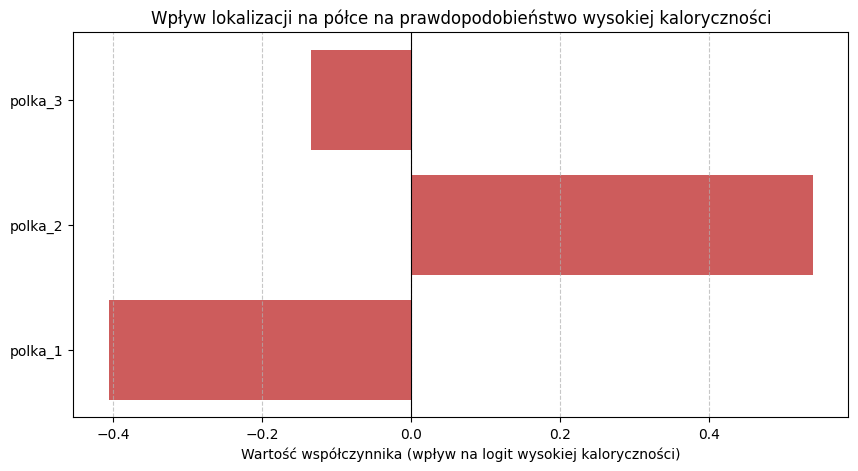

In [126]:
import matplotlib.pyplot as plt

# Robimy wykres słupkowy, żeby wizualnie porównać wpływ każdej półki
plt.figure(figsize=(10, 5))
# Używamy koloru indianred, żeby odróżnić to od poprzednich zadań
plt.barh(cechy_polek, wspolczynniki_kalorie, color='indianred')
# Linia zero pomaga zobaczyć, co ma wpływ dodatni, a co ujemny
plt.axvline(0, color='black', linewidth=0.8)

# Podpisy osi i tytuł wykresu
plt.xlabel('Wartość współczynnika (wpływ na logit wysokiej kaloryczności)')
plt.title('Wpływ lokalizacji na półce na prawdopodobieństwo wysokiej kaloryczności')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

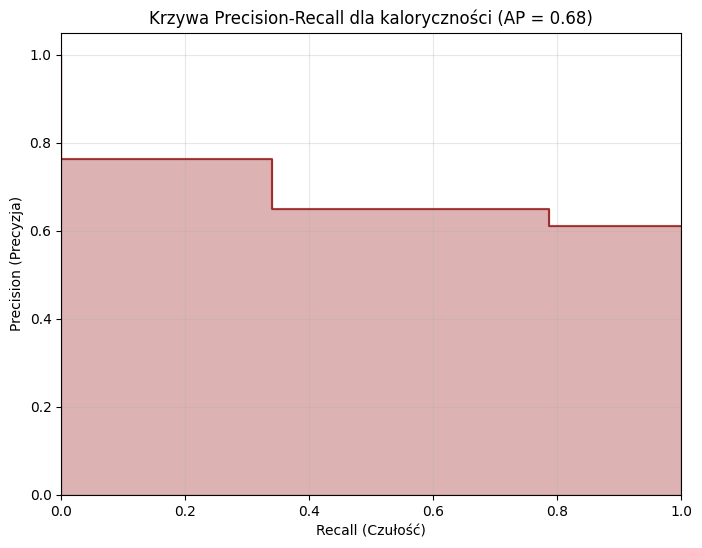

Średnia Precyzja (Average Precision) dla modelu kaloryczności: 0.6793


In [127]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Pobieramy prawdopodobieństwo bycia "wysokokalorycznym" dla każdego produktu
y_probs_kalorie = model_kalorie.predict_proba(X)[:, 1]

# 2. Liczymy dane do krzywej Precision-Recall oraz ogólny wynik AP
precision, recall, _ = precision_recall_curve(y, y_probs_kalorie)
ap_score = average_precision_score(y, y_probs_kalorie)

# 3. Rysujemy wykres jakości modelu w kolorze ciemnoczerwonym
plt.figure(figsize=(8, 6))
# Rysujemy schodkową linię precyzji i czułości
plt.step(recall, precision, color='darkred', alpha=0.7, where='post')
# Wypełniamy tło pod linią
plt.fill_between(recall, precision, step='post', alpha=0.3, color='darkred')

# Ustawiamy etykiety i limity osi (od 0 do 1)
plt.xlabel('Recall (Czułość)')
plt.ylabel('Precision (Precyzja)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Krzywa Precision-Recall dla kaloryczności (AP = {ap_score:.2f})')
plt.grid(alpha=0.3)
plt.show()

# Wypisujemy wynik AP z dużą dokładnością
print(f"Średnia Precyzja (Average Precision) dla modelu kaloryczności: {ap_score:.4f}")

3.Które wartości odżywcze determinują umieszczenie płatków śniadaniowych na poziomie najwyższej półki?

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Wybieramy te same cechy (składniki), ale teraz sprawdzamy ich wpływ na 3. półkę
cechy = ['tluszcz', 'proteiny', 'potas', 'blonnik', 'sod', 'cukry','weglowodany']
X_p3 = df_cereals[cechy].values
y_p3 = df_cereals['polka_3'].values

# 2. Skalujemy dane, żeby jednostki (np. mg vs g) nie psuły wyników modelu
scaler = StandardScaler()
X_p3_scaled = scaler.fit_transform(X_p3)

# 3. Tworzymy model regresji logistycznej
# Ustawiamy max_iter na 1000, żeby uniknąć błędu zbieżności, o którym wspominałeś
model_p3 = LogisticRegression(max_iter=1000)
model_p3.fit(X_p3_scaled, y_p3)

# 4. Pobieramy wagi modelu dla każdego składnika
wspolczynniki_p3 = model_p3.coef_[0]

# Kontrolne wypisanie wyników do konsoli
print("Model dla najwyższej półki został wytrenowany poprawnie!")
for nazwa, wartosc in zip(cechy, wspolczynniki_p3):
    print(f"Cecha: {nazwa:10} | Współczynnik: {wartosc:.4f}")
    
# Wypisanie wyrazu wolnego (beta0)
print(f"\nWyraz wolny (beta0) wynosi: {model_p3.intercept_[0]:.4f}")

Model dla najwyższej półki został wytrenowany poprawnie!
Cecha: tluszcz    | Współczynnik: 0.4669
Cecha: proteiny   | Współczynnik: -0.1694
Cecha: potas      | Współczynnik: 0.8404
Cecha: blonnik    | Współczynnik: 0.4267
Cecha: sod        | Współczynnik: 0.0497
Cecha: cukry      | Współczynnik: -0.3441
Cecha: weglowodany | Współczynnik: 0.1291

Wyraz wolny (beta0) wynosi: -0.0978


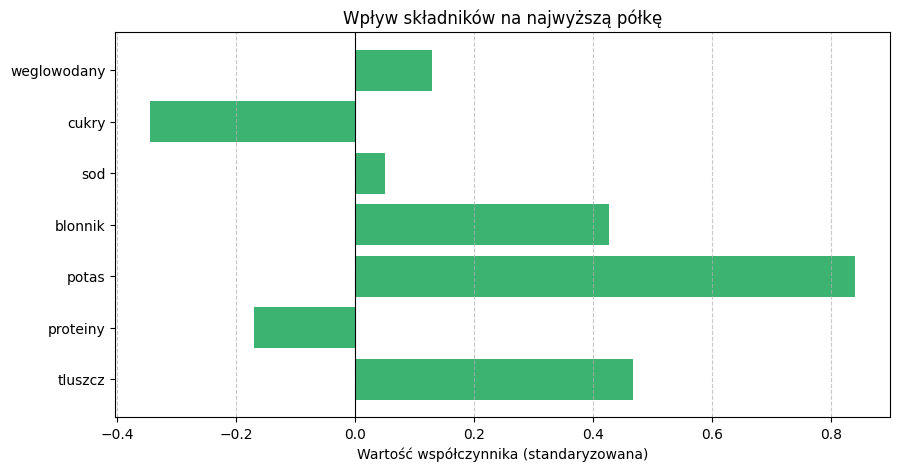

In [129]:
import matplotlib.pyplot as plt

# Tworzymy wykres wag, żeby zobaczyć co promuje produkt na górną półkę
plt.figure(figsize=(10, 5))
# Używamy koloru zielonego (mediumseagreen), kojarzonego z produktami premium/fit
plt.barh(cechy, wspolczynniki_p3, color='mediumseagreen')
# Dodajemy pionową linię w punkcie zero
plt.axvline(0, color='black', linewidth=0.8)

# Opisujemy osie i tytułujemy wykres
plt.xlabel('Wartość współczynnika (standaryzowana)')
plt.title('Wpływ składników na najwyższą półkę')
# Dodajemy delikatną siatkę dla czytelności
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Średnia Precyzja (Average Precision) dla Pytania 3: 0.7737


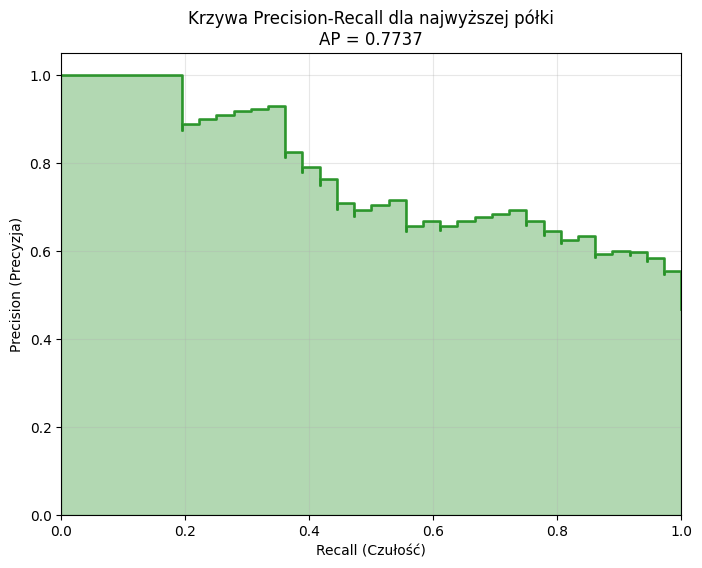

In [130]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Liczymy szanse na bycie na 3. półce (pamiętamy o użyciu danych skalowanych)
y_probs_p3 = model_p3.predict_proba(X_p3_scaled)[:, 1]

# 2. Wyznaczamy punkty do narysowania krzywej PR
precision_p3, recall_p3, _ = precision_recall_curve(y_p3, y_probs_p3)

# 3. Obliczamy wynik AP (średnia precyzja), czyli jakość naszego modelu
ap_p3 = average_precision_score(y_p3, y_probs_p3)

# 4. Wyświetlamy wynik w konsoli z dużą dokładnością
print(f"Średnia Precyzja (Average Precision) dla Pytania 3: {ap_p3:.4f}")

# 5. Rysujemy wykres precyzji w funkcji czułości
plt.figure(figsize=(8, 6))
# Rysujemy zieloną linię schodkową i wypełniamy obszar pod nią
plt.step(recall_p3, precision_p3, color='g', alpha=0.7, where='post', linewidth=2)
plt.fill_between(recall_p3, precision_p3, step='post', alpha=0.3, color='g')

# Standardowe podpisy i ustawienie granic osi od 0 do 1
plt.xlabel('Recall (Czułość)')
plt.ylabel('Precision (Precyzja)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Krzywa Precision-Recall dla najwyższej półki\nAP = {ap_p3:.4f}')
plt.grid(alpha=0.3)
plt.show()

4.Które wartości odżywcze determinują umieszczenie płatków śniadaniowych na poziomie najniższej półki?

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Przygotowujemy dane: X to nasze składniki, a y to informacja o 1. półce (najniższej)
cechy = ['tluszcz', 'proteiny', 'potas', 'blonnik', 'sod', 'cukry','weglowodany']
X_p1 = df_cereals[cechy].values
y_p1 = df_cereals['polka_1'].values

# 2. Skalujemy dane, żeby wyrównać znaczenie składników podawanych w gramach i miligramach
scaler = StandardScaler()
X_p1_scaled = scaler.fit_transform(X_p1)

# 3. Tworzymy model regresji logistycznej z limitem 1000 kroków obliczeń
model_p1 = LogisticRegression(max_iter=1000)
model_p1.fit(X_p1_scaled, y_p1)

# 4. Wyciągamy wagi składników, żeby zobaczyć co decyduje o dolnej półce
wspolczynniki_p1 = model_p1.coef_[0]

# Wypisujemy wyniki w konsoli, żeby mieć podgląd liczb
print("Model dla najniższej półki został wytrenowany poprawnie!")
for nazwa, wartosc in zip(cechy, wspolczynniki_p1):
    print(f"Cecha: {nazwa:10} | Współczynnik: {wartosc:.4f}")
    
# Wypisanie wyrazu wolnego (beta0)
print(f"\nWyraz wolny (beta0) wynosi: {model_p1.intercept_[0]:.4f}")

Model dla najniższej półki został wytrenowany poprawnie!
Cecha: tluszcz    | Współczynnik: -0.5360
Cecha: proteiny   | Współczynnik: 0.3073
Cecha: potas      | Współczynnik: -0.3187
Cecha: blonnik    | Współczynnik: -0.1260
Cecha: sod        | Współczynnik: 0.2472
Cecha: cukry      | Współczynnik: -0.3758
Cecha: weglowodany | Współczynnik: 0.1475

Wyraz wolny (beta0) wynosi: -1.2498


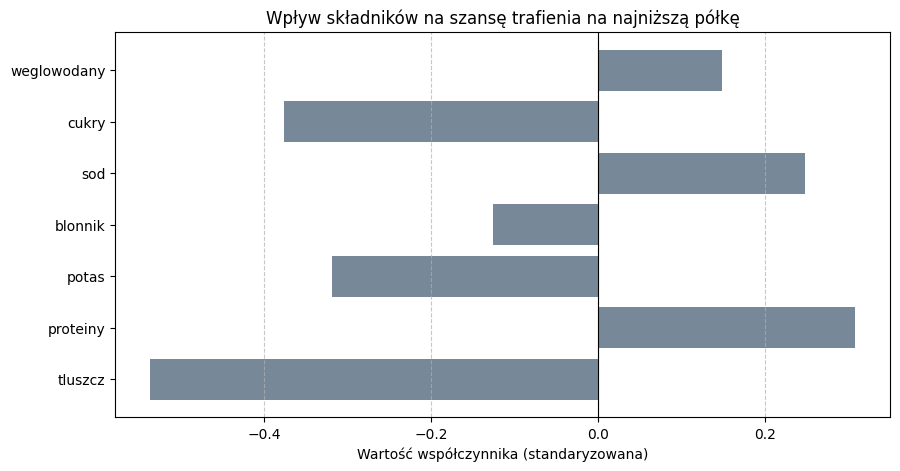

In [132]:
import matplotlib.pyplot as plt

# Tworzymy poziomy wykres słupkowy dla współczynników modelu
plt.figure(figsize=(10, 5))
# Ustawiamy szary kolor (lightslategray) dla odróżnienia od poprzednich półek
plt.barh(cechy, wspolczynniki_p1, color='lightslategray')
# Dodajemy czarną linię na środku (punkt zero)
plt.axvline(0, color='black', linewidth=0.8)

# Podpisy i siatka wykresu
plt.xlabel('Wartość współczynnika (standaryzowana)')
plt.title('Wpływ składników na szansę trafienia na najniższą półkę')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

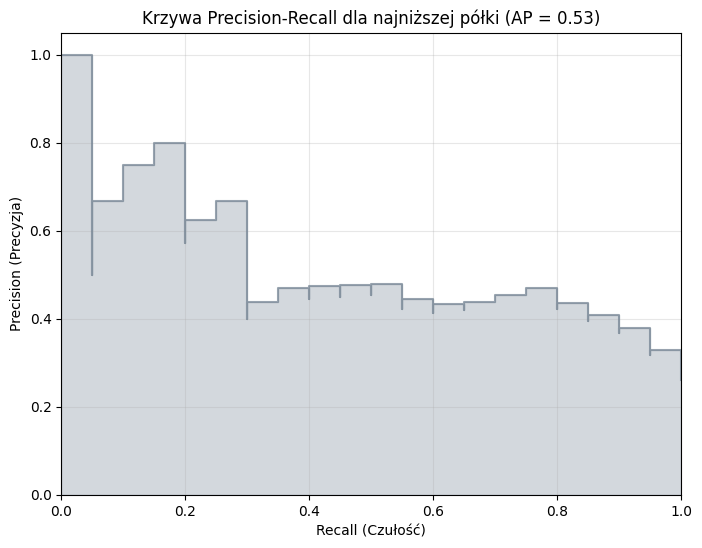

Średnia Precyzja (AP) dla najniższej półki: 0.5319


In [133]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Liczymy prawdopodobieństwo przynależności do najniższej półki dla wszystkich produktów
y_probs_p1 = model_p1.predict_proba(X_p1_scaled)[:, 1]

# 2. Obliczamy punkty do wykresu oraz metrykę AP (średnia precyzja)
precision_p1, recall_p1, _ = precision_recall_curve(y_p1, y_probs_p1)
ap_p1 = average_precision_score(y_p1, y_probs_p1)

# 3. Rysujemy wykres Precision-Recall
plt.figure(figsize=(8, 6))
# Rysujemy linię schodkową i wypełniamy pole pod nią szarym kolorem
plt.step(recall_p1, precision_p1, color='slategray', alpha=0.7, where='post')
plt.fill_between(recall_p1, precision_p1, step='post', alpha=0.3, color='slategray')

# Ustawienia osi (zakres od 0 do 1) i podpisy
plt.xlabel('Recall (Czułość)')
plt.ylabel('Precision (Precyzja)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Krzywa Precision-Recall dla najniższej półki (AP = {ap_p1:.2f})')
plt.grid(alpha=0.3)
plt.show()

# Wypisujemy końcowy wynik AP w konsoli
print(f"Średnia Precyzja (AP) dla najniższej półki: {ap_p1:.4f}")

5. Czy te płatki to płatki producenta K?

Średnie wartości składników (Inni vs K):


,kalorie,cukry,proteiny,tluszcz,sod,blonnik,potas,weglowodany
is_k,,,,,,,,
0,106.111111,6.666667,2.500000,1.185185,153.240741,1.901852,93.185185,14.722222
1,108.695652,7.565217,2.652174,0.608696,174.782609,2.739130,103.043478,15.130435


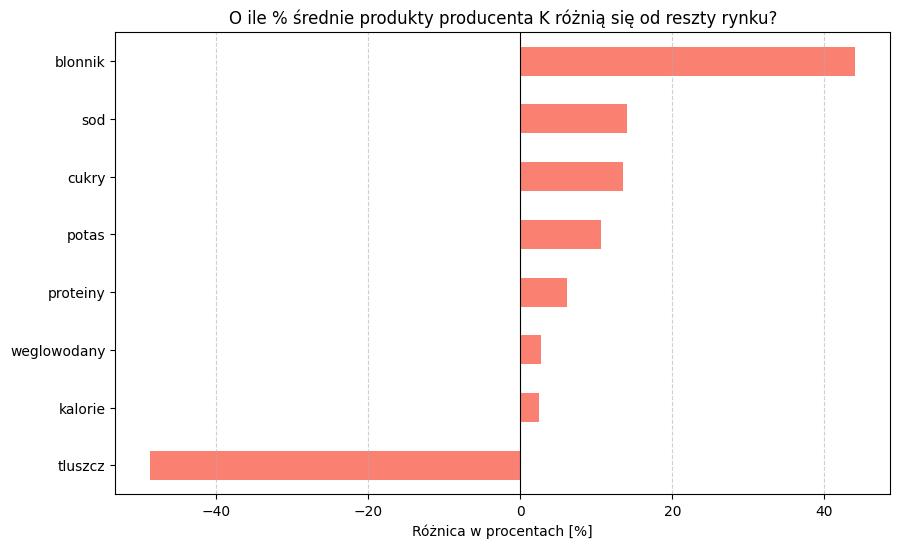

In [134]:
import matplotlib.pyplot as plt

# 1. Tworzymy nową kolumnę: 1 jeśli producent to K (Kellogg's), 0 dla całej reszty
df_cereals['is_k'] = (df_cereals['producent'] == 'K').astype(int)

# 2. Wybieramy wszystkie składniki, które mogą odróżniać tę markę od innych
cechy_num = ['kalorie', 'cukry', 'proteiny', 'tluszcz', 'sod', 'blonnik', 'potas', 'weglowodany']

# 3. Liczymy średni skład dla produktów Kellogg's i dla konkurencji
porownanie = df_cereals.groupby('is_k')[cechy_num].mean()

# 4. Sprawdzamy procentową różnicę w składzie – co jest znakiem rozpoznawczym marki K
roznica_procentowa = ((porownanie.loc[1] - porownanie.loc[0]) / porownanie.loc[0]) * 100

# Wyświetlamy tabelę ze średnimi w notatniku
print("Średnie wartości składników (Inni vs K):")
display(porownanie)

# 5. Rysujemy wykres słupkowy różnic procentowych
plt.figure(figsize=(10, 6))
# Sortujemy wartości, żeby wykres był czytelny, i używamy koloru łososiowego
roznica_procentowa.sort_values().plot(kind='barh', color='salmon')
# Dodajemy linię pionową w punkcie 0 dla porównania
plt.axvline(0, color='black', linewidth=0.8)
plt.title('O ile % średnie produkty producenta K różnią się od reszty rynku?')
plt.xlabel('Różnica w procentach [%]')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [135]:
import itertools
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Definiujemy listę cech, z których będziemy tworzyć różne kombinacje
wszystkie_cechy = ['tluszcz', 'proteiny', 'potas', 'blonnik', 'sod', 'cukry', 'weglowodany']
y_k = (df_cereals['producent'] == 'K').astype(int)

# Zmienne do przechowywania najlepszego wyniku
najlepsze_ap_cv = 0
najlepsza_kombinacja = []

print("Rozpoczynam poszukiwanie najlepszego modelu (Cross-Validation)...")

# 2. Pętla sprawdzająca wszystkie możliwe połączenia cech (od 1 do 7 elementów)
for r in range(1, len(wszystkie_cechy) + 1):
    for komb in itertools.combinations(wszystkie_cechy, r): 
        #wszystkie mozliwe kombinacje cech itertools.combinations
        komb = list(komb)
        X_tmp = df_cereals[komb].values
        # Skalujemy dane dla każdej kombinacji z osobna
        X_tmp_scaled = StandardScaler().fit_transform(X_tmp)
        
        model_tmp = LogisticRegression(max_iter=1000)
        
        # Stosujemy walidację krzyżową (podział na 5 części), żeby uniknąć przypadku
        # Obliczamy średni wynik AP dla danej kombinacji składników
        scores = cross_val_score(model_tmp, X_tmp_scaled, y_k, cv=5, scoring='average_precision')
        #walidacja krzyzowa trenuje model na 4 czesciach a testuje na jednej
        mean_ap = scores.mean()
        
        # Jeśli ten zestaw cech jest lepszy od poprzednich, zapamiętujemy go
        if mean_ap > najlepsze_ap_cv:
            najlepsze_ap_cv = mean_ap #zostawia najlepsze ap
            najlepsza_kombinacja = komb

# Wypisujemy zestaw składników, który najlepiej pozwala rozpoznać markę K
print(f"Wybrany optymalny zestaw cech: {najlepsza_kombinacja}")

Rozpoczynam poszukiwanie najlepszego modelu (Cross-Validation)...
Wybrany optymalny zestaw cech: ['tluszcz', 'proteiny', 'potas', 'blonnik', 'sod', 'cukry']



Współczynniki dla najlepszego modelu:
Cecha: tluszcz    | Współczynnik: -0.9440
Cecha: proteiny   | Współczynnik: 0.4662
Cecha: potas      | Współczynnik: -0.6464
Cecha: blonnik    | Współczynnik: 0.7916
Cecha: sod        | Współczynnik: 0.3542
Cecha: cukry      | Współczynnik: 0.6810

Wyraz wolny (beta0) wynosi: -1.0455


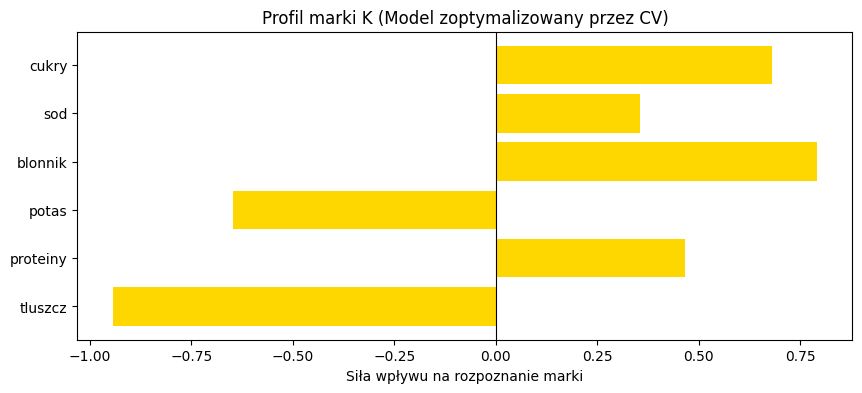

In [136]:
# 1. Przygotowujemy dane końcowe używając tylko najlepszych cech znalezionych wcześniej
X_best = df_cereals[najlepsza_kombinacja].values
X_best_scaled = StandardScaler().fit_transform(X_best)

# 2. Trenujemy ostateczny model na całym zbiorze danych
model_final = LogisticRegression(max_iter=1000)
model_final.fit(X_best_scaled, y_k)

# 3. Wypisujemy wagi składników dla najlepszego modelu w konsoli
print("\nWspółczynniki dla najlepszego modelu:")
for nazwa, wartosc in zip(najlepsza_kombinacja, model_final.coef_[0]):
    print(f"Cecha: {nazwa:10} | Współczynnik: {wartosc:.4f}")

# Wypisanie wyrazu wolnego (beta0)
print(f"\nWyraz wolny (beta0) wynosi: {model_final.intercept_[0]:.4f}")

# 4. Rysujemy złoty wykres słupkowy wag dla rozpoznawania marki
plt.figure(figsize=(10, 4))
plt.barh(najlepsza_kombinacja, model_final.coef_[0], color='gold')
plt.axvline(0, color='black', linewidth=0.8)
plt.title(f'Profil marki K (Model zoptymalizowany przez CV)')
plt.xlabel('Siła wpływu na rozpoznanie marki')
plt.show()

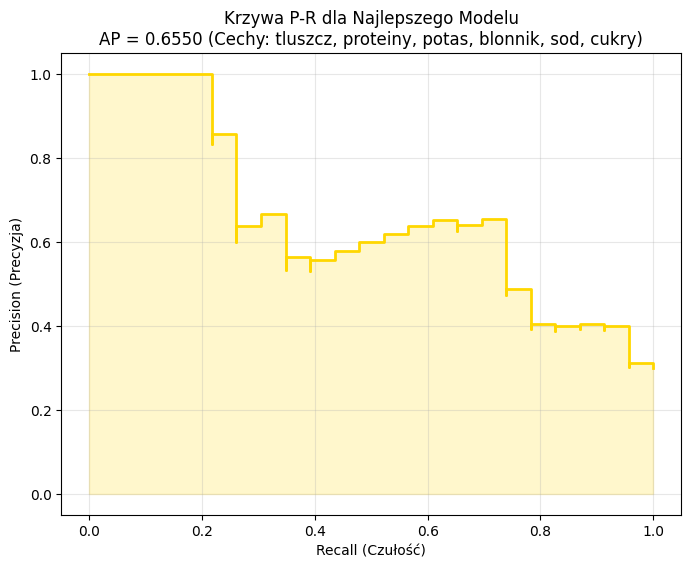

In [137]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Wyliczamy prawdopodobieństwo, że dany produkt to Kellogg's
y_probs_final = model_final.predict_proba(X_best_scaled)[:, 1]

# 2. Obliczamy punkty krzywej oraz ostateczny wynik AP
precision, recall, _ = precision_recall_curve(y_k, y_probs_final)
final_ap_score = average_precision_score(y_k, y_probs_final)

# 3. Rysujemy finalną krzywą jakości modelu w kolorze złotym
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='gold', where='post', linewidth=2)
# Cieniujemy obszar pod krzywą dla lepszego efektu wizualnego
plt.fill_between(recall, precision, step='post', alpha=0.2, color='gold')

# Etykiety i tytuł z listą wykorzystanych cech
plt.xlabel('Recall (Czułość)')
plt.ylabel('Precision (Precyzja)')
plt.title(f'Krzywa P-R dla Najlepszego Modelu\nAP = {final_ap_score:.4f} (Cechy: {", ".join(najlepsza_kombinacja)})')
plt.grid(alpha=0.3)
plt.show()

6.Jaki składnik świadczy o niskokaloryczności produktu (< 100 kcal)?

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. Tworzymy zmienną celu: sprawdzamy, które płatki mają mniej niż 100 kalorii
# Jeśli mają mniej niż 100 kcal, dostają 1, jeśli więcej lub równe - 0
y = (df_cereals['kalorie'] < 100).astype(int).values

# 2. Wybieramy składniki odżywcze do analizy profilu niskokalorycznego
cechy = ['tluszcz', 'proteiny', 'potas', 'blonnik', 'sod', 'cukry', 'weglowodany']
X = df_cereals[cechy].values

# 3. Wykonujemy standaryzację danych, żeby wyrównać skale różnych składników
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Tworzymy i trenujemy model regresji logistycznej
# Ustawiamy limit 1000 prób, żeby algorytm na pewno znalazł rozwiązanie
model_low_cal = LogisticRegression(max_iter=1000)
model_low_cal.fit(X_scaled, y)

# 5. Wyciągamy wagi (współczynniki), które pokazują znaczenie każdego składnika
wspolczynniki = model_low_cal.coef_[0]

# Wypisujemy wyniki w konsoli dla każdego składnika z osobna
print("Model dla niskokaloryczności został wytrenowany!")
for nazwa, wartosc in zip(cechy, wspolczynniki):
    print(f"Cecha: {nazwa:12} | Współczynnik: {wartosc:.4f}")
    
# Wypisanie wyrazu wolnego (beta0)
print(f"\nWyraz wolny (beta0) wynosi: {model_low_cal.intercept_[0]:.4f}")    

Model dla niskokaloryczności został wytrenowany!
Cecha: tluszcz      | Współczynnik: -1.0834
Cecha: proteiny     | Współczynnik: -0.9483
Cecha: potas        | Współczynnik: 0.7808
Cecha: blonnik      | Współczynnik: 1.1636
Cecha: sod          | Współczynnik: -0.7879
Cecha: cukry        | Współczynnik: -1.4873
Cecha: weglowodany  | Współczynnik: -0.4759

Wyraz wolny (beta0) wynosi: -2.8916


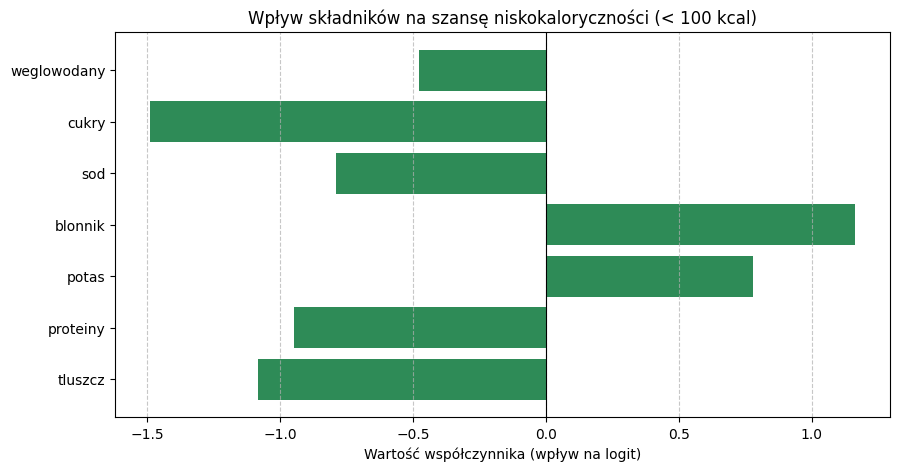

In [139]:
import matplotlib.pyplot as plt

# Przygotowujemy wykres słupkowy, żeby zobaczyć wpływ składników na kaloryczność
plt.figure(figsize=(10, 5))
# Używamy koloru seagreen (morski zielony), kojarzącego się ze zdrową żywnością
plt.barh(cechy, wspolczynniki, color='seagreen')
# Dodajemy linię pionową w punkcie zero dla odniesienia
plt.axvline(0, color='black', linewidth=0.8)

# Dodajemy opisy osi i tytuł wykresu
plt.xlabel('Wartość współczynnika (wpływ na logit)')
plt.title('Wpływ składników na szansę niskokaloryczności (< 100 kcal)')
# Dodajemy siatkę, żeby łatwiej było odczytać wartości z osi X
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Interpretacja:
# Dodatnie słupki oznaczają, że składnik sprzyja niskiej kaloryczności.
# Ujemne słupki oznaczają, że składnik "pcha" produkt w stronę wysokich kalorii.

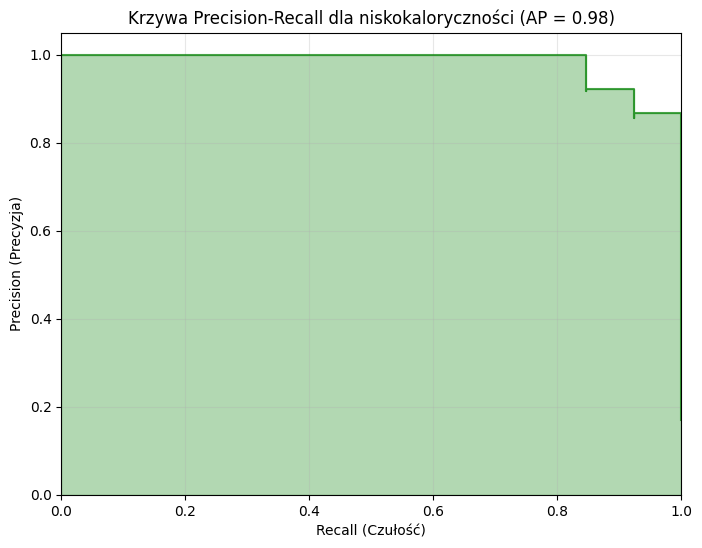

Średnia Precyzja (Average Precision): 0.9838


In [140]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# 1. Liczymy prawdopodobieństwo bycia produktem niskokalorycznym dla każdego wiersza
y_probs = model_low_cal.predict_proba(X_scaled)[:, 1]

# 2. Obliczamy punkty precyzji i czułości dla różnych progów odcięcia
precision, recall, _ = precision_recall_curve(y, y_probs)

# 3. Liczymy wskaźnik AP, który podsumowuje jak dobry jest nasz model klasyfikacji
ap_score = average_precision_score(y, y_probs)

# 4. Rysujemy finalny wykres Precision-Recall
plt.figure(figsize=(8, 6))
# Rysujemy zieloną linię schodkową i wypełniamy pole pod nią
plt.step(recall, precision, color='g', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='g')

# Podpisywanie osi i ustawianie zakresów od 0 do 1
plt.xlabel('Recall (Czułość)')
plt.ylabel('Precision (Precyzja)')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Krzywa Precision-Recall dla niskokaloryczności (AP = {ap_score:.2f})')
plt.grid(alpha=0.3)
plt.show()

# Wypisujemy dokładną wartość AP w konsoli
print(f"Średnia Precyzja (Average Precision): {ap_score:.4f}")